# Regression Analysis (I)

En este cuaderno vemos cómo el análisis de regresión puede ayudar a **entender el comportamiento de los datos**, **predecir valores** (continuos o dicotómicos) y **encontrar predictores importantes** (modelos dispersos).
Presentamos diferentes modelos de regresión: regresión lineal simple, regresión lineal múltiple y regresión polinómica.
Evaluamos los resultados cualitativamente mediante herramientas de visualización de Seaborn y cuantitativamente mediante la biblioteca Scikit-learn, así como otros módulos.


### Contenido:

* Regresión
  * Regresión Lineal Simple
  * Regresión Lineal Múltiple
  * Regresión Polinómica
* OLS (Ordinary Least Squares)
* Evaluación del ajuste (MSE y R²)
* Predicción (Scikit-learn)
* Visualización (Seaborn lmplot)


### De los Datos a los Modelos
Se pregunta por una variable $\textbf{y}$ (*respuesta*) que puede expresarse como una combinación de una o más variables (independientes) $\textbf{x}_i$ (comúnmente llamadas *covariables* o *predictores* o *regresores*).

El papel de la regresión es construir un modelo (fórmula) para predecir la respuesta a partir de las covariables.

### Notación
$x_i$ elemento de un vector, $\textbf{x}$ vector columna, $\textbf{x'}$ (transposición de $\textbf{x}$) vector fila, $X$ matriz.

# Linear Regression Model

El modelo más simple que podemos considerar es el **modelo lineal**, donde la respuesta $\textbf{y}$ depende linealmente de los predictores $\textbf{x}_i$:

$$ \textbf{y} = a_1 \textbf{x}*1 + \dots + a_m \textbf{x}*{m} + \epsilon $$

Los $a_i$ se denominan *parámetros* del modelo o *coeficientes*, y $\epsilon$ se denomina *término de error*, *término de perturbación* o *ruido* (en contraste con la “señal” proporcionada por el resto del modelo). Esta variable capta todos los demás factores que influyen en la variable dependiente $\textbf{y}$ además de los predictores $\textbf{x}$.

Esta ecuación puede reescribirse de forma más compacta (matricial) como:

$$ \textbf{y} = X \textbf{w} + \epsilon $$

donde

$$ \textbf{y} = \left( \begin{array}{c} y_1 \ y_2 \ \vdots \ y_n \end{array} \right),
X = \left( \begin{array}{c} x_{11} \dots x_{1m} \ x_{21} \dots x_{2m} \ \vdots \ x_{n1} \dots x_{nm} \end{array} \right),
\textbf{w} = \left( \begin{array}{c} a_1 \ a_2 \ \vdots \ a_m \end{array} \right),
\epsilon = \left( \begin{array}{c} \epsilon_1 \ \epsilon_2 \ \vdots \ \epsilon_m \end{array} \right) $$

La **regresión lineal** es la técnica para crear modelos lineales.


### Regresión Lineal Simple

En la **regresión lineal simple**, con una sola variable, se describe la relación entre el predictor y la respuesta mediante una línea recta.

El modelo es:

$$ \textbf{y} = a_0 + a_1 \textbf{x}_1 + \epsilon $$

El parámetro $a_0$ se denomina *término constante* o *intercepto*.

En la forma matricial, se agrega un término constante cambiando a la matriz: $(\textbf{1}, X)$.


### Regresión Lineal Múltiple

En la Regresión de Mínimos Cuadrados Ordinarios con una sola variable describimos la relación entre el predictor y la respuesta mediante una línea recta. Este caso se denomina *regresión lineal simple*.

La regresión lineal simple puede extenderse a un número mayor de variables. Con m variables predictoras, ajustaremos un hiperplano de m dimensiones a nuestros m predictores.

$$ \textbf{y} = a_1 \textbf{x}_1 + \dots + a_m \textbf{x}_m = X \textbf{w} $$

### Regresión Polinómica Múltiple

A pesar de su nombre, la regresión lineal puede utilizarse para ajustar funciones no lineales. Un modelo de regresión lineal es lineal en los parámetros del modelo, no necesariamente en los predictores. Si se añaden transformaciones no lineales de los predictores al modelo de regresión lineal, el modelo será no lineal en los predictores.

$$ \textbf{y} = a_1 \phi(\textbf{x}_1) + \dots + a_m \phi(\textbf{x}_m) $$

Esta técnica no lineal muy popular es la *Regresión Polinómica*, una técnica que modela la relación entre la respuesta y los predictores como un polinomio de orden n. Cuanto mayor sea el orden del polinomio, más “onduladas” serán las funciones que pueden ajustarse.

Podemos representar una relación curva entre nuestras variables introduciendo términos **polinómicos**, como por ejemplo, un modelo cúbico:

$$y_i \approx a_0 + a_1 x_i + a_2 x_i^2 + a_3 x_i^3$$

El uso de polinomios de orden superior tiene un costo: **complejidad computacional** y **sobreajuste**. El sobreajuste se refiere a una situación en la que el modelo ajusta las particularidades de los datos de entrenamiento y pierde la capacidad de generalizar para predecir datos no observados.


### Interpolación vs. Extrapolación

En la práctica, cuando hacemos una predicción para algún valor de X que no hemos visto antes, debemos ser cuidadosos:

- **Interpolación**: Predecir y para un valor de X que está **dentro** del rango de valores observados en los datos de entrenamiento.
- **Extrapolación**: Predecir y para un valor de X que está **fuera** del rango de valores observados en los datos de entrenamiento.

**Precaución con la extrapolación**: Para conjuntos de datos reales, incluso si un ajuste lineal parece apropiado, la extrapolación puede conducir a predicciones erróneas porque el modelo **no aprendió** sobre ese rango de valores.

**Solución en Machine Learning**: La extrapolación NO es un problema permanente. Si necesitas predecir valores fuera del rango actual:

1. **Recolecta datos** que cubran el nuevo rango de interés
2. **Reentrena el modelo** con el dataset expandido
3. El modelo ahora puede **interpolar** en el nuevo rango

**Ejemplo práctico**: 
- Dataset original: precios de departamentos entre USD 20.000 y USD 200.000
- Necesitas predecir un departamento de USD 250.000 (extrapolación = riesgoso)
- Solución: Consigue datos de departamentos entre USD 200.000 y USD 300.000
- Reentrena el modelo → Ahora USD 250.000 es interpolación (confiable)

**Principio clave**: Los algoritmos de ML aprenden de los datos. Si no han visto cierto rango, no pueden predecir bien ahí. La solución es **expandir los datos de entrenamiento**, no aceptar que "no se puede extrapolar".

## Regresión Lineal Simple

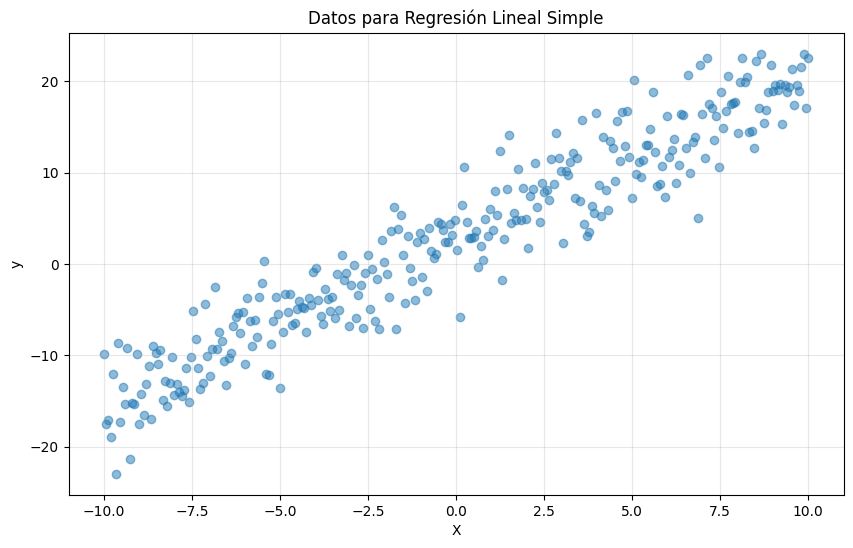

In [1]:
# Importamos librerías
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

# Configuramos la seed = 1
# sirve para que los números "aleatorios" sean siempre los mismos
seed=1
np.random.seed(seed)

# Definimos los parámetros reales (los que queremos que el modelo aprenda)
w0 = 2.5   # Intercepto (ordenada al origen)
w1 = 1.8   # Pendiente (peso de X)

# Generamos 300 valores de X entre -10 y 10
n_samples = 300
X = np.linspace(-10, 10, n_samples)

# Generamos ruido aleatorio (error)
ruido = np.random.randn(n_samples) * 3.5

# Creamos y usando la ecuación de regresión simple:
# y = w0 + w1*X + ruido
y = w0 + w1*X + ruido

# Visualizamos los datos generados
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Datos para Regresión Lineal Simple')
plt.grid(True, alpha=0.3)
plt.show()

In [4]:
# Creamos un modelo lineal para explicar los datos

# np.linspace(inicio, fin, cantidad)
# Crea un array con valores equidistantes entre inicio y fin
# Ejemplo: np.linspace(-10, 10, 100) crea 100 valores entre -10 y 10
# Lo usamos para crear puntos suaves para dibujar líneas continuas

# plt.plot(x, y, color, label='texto')


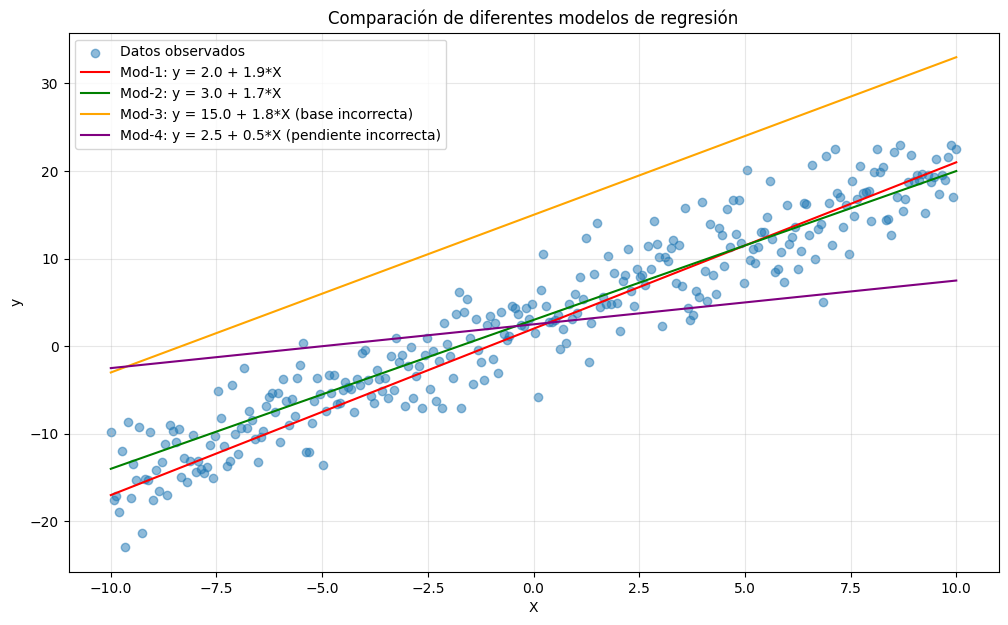

In [2]:
# Visualizamos los datos
plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.5, label='Datos observados')

# Creamos un rango de X para dibujar las líneas de los modelos
X_linea = np.linspace(-10, 10, 100)

# MODELO 1: "Bueno" - cerca de los parámetros reales
modelo1 = 2.0 + 1.9 * X_linea
plt.plot(X_linea, modelo1, color='red',
         label='Mod-1: y = 2.0 + 1.9*X')

# MODELO 2: "Bueno" - cerca de los parámetros reales (otra variación)
modelo2 = 3.0 + 1.7 * X_linea
plt.plot(X_linea, modelo2, color='green',
         label='Mod-2: y = 3.0 + 1.7*X')

# MODELO 3: Intercepto incorrecto (mantiene pendiente correcta)
modelo3 = 15.0 + 1.8 * X_linea
plt.plot(X_linea, modelo3, color='orange',
         label='Mod-3: y = 15.0 + 1.8*X (base incorrecta)')

# MODELO 4: Pendiente incorrecta (mantiene intercepto correcto)
modelo4 = 2.5 + 0.5 * X_linea
plt.plot(X_linea, modelo4, color='purple',
         label='Mod-4: y = 2.5 + 0.5*X (pendiente incorrecta)')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Comparación de diferentes modelos de regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### OLS (Ordinary Least Squares) y MSE (Mean Squared Error)

#### ¿QUÉ ES OLS (Ordinary Least Squares)?

OLS o Mínimos Cuadrados Ordinarios es el MÉTODO más utilizado para encontrar los parámetros óptimos (w0 y w1) en una regresión lineal. Buscamos encontrar la línea que "mejor se ajuste" a nuestros datos y, OLS nos dice que la mejor línea es aquella que MINIMIZA la SUMA DE LOS ERRORES AL CUADRADO.

Fórmula:
$$\widehat{\textbf{y}} = \widehat{w}_0+\widehat{w}_1 \textbf{x}$$

Donde:
- w0 = intercepto (donde la línea cruza el eje y cuando X=0)
- w1 = pendiente (cuánto aumenta y cuando X aumenta en 1 unidad)
- Los sombreros representan que las variables son estimadas.

ERROR (RESIDUO): Para cada punto de datos, el error es la diferencia entre:
- error = y_real - y_predicho = y_real - H(w)
- y_real (el valor que observamos)
- H(w) = y_predicho (el valor que predice nuestra línea)

Ventajas de OLS:
- Computacionalmente eficiente
- Tiene solución matemática exacta (no requiere iteraciones)
- Fácil de interpretar
- Funciona bien cuando los errores siguen una distribución normal

#### ¿QUÉ ES MSE (Mean Squared Error)?

- MSE o Error Cuadrático Medio es la FUNCIÓN DE COSTO que minimizamos cuando usamos el método OLS.
- OLS es el MÉTODO → MSE es la FUNCIÓN COSTO que minimiza
- El MSE nos dice, EN PROMEDIO, qué tan equivocadas están nuestras predicciones.

Fórmula:
$$
\text{FUNCIÓN COSTO J (MSE)} = \sum_{i=1}^n ( y_ireal - Hw_i )^2,
$$

Donde:
- n = número total de observaciones
- Σ = suma de todos los errores al cuadrado
- 1/n = promedio (divide la suma entre el número de observaciones)

Características:
- Elevar al cuadrado hace que todos los errores sean SIEMPRE positivos.
- MSE = 0 significa predicción perfecta (todos los puntos en la línea)
- Penaliza más los errores grandes (un error de 2 se convierte en 4, pero un error de 10 se convierte en 100).
- Cuanto más PEQUEÑO el MSE, mejor el modelo

#### OTROS ESTIMADORES

Además de MSE, existen otras funciones de costo que se pueden minimizar:

1. SSE (Sum of Squared Errors) - SUMA DE ERRORES AL CUADRADO
   
   SSE = Σ (y_real - y_predicho)²
   
   - Es lo mismo que MSE pero SIN dividir entre n.
   - Minimizar SSE da los mismos parámetros que minimizar MSE.
   - Diferencia: SSE crece con más datos, MSE no.
.
2. MAE (Mean Absolute Error) - ERROR ABSOLUTO MEDIO

   MAE = 1/n *  (i=1) Σ (n) |y_real_i - y_predicho_i|
   
   - Usa valor absoluto en lugar de elevar al cuadrado.
   - Menos sensible a valores atípicos (outliers).
   - No penaliza tanto los errores grandes.
   - Unidades: mismas que y (no al cuadrado).
.
3. SAE (Sum of Absolute Errors) - SUMA DE ERRORES ABSOLUTOS
   
   SAE = Σ |y_real - y_predicho|
   
   - Es lo mismo que MAE pero SIN dividir entre n
.
EN ESTE CURSO USAREMOS MSE porque:
- Es el estándar en Machine Learning
- Tiene propiedades matemáticas convenientes (es derivable)
- Es lo que usan bibliotecas como scikit-learn por defecto

#### DEMO
https://phet.colorado.edu/sims/html/least-squares-regression/latest/least-squares-regression_all.html

In [3]:
# CASO PRÁCTICO - REGRESIÓN LINEAL SIMPLE MINIMIZANDO MSE
# =======================================================

# Definimos la función para calcular el MSE
def calcular_mse(w0, w1, X, y):
    """
    Calcula el Error Cuadrático Medio
    Parámetros:
    w0 : float  - Intercepto de la línea
    w1 : float  - Pendiente de la línea
    X : array   - Variable independiente
    y : array   - Variable dependiente (valores reales)
    Retorna:
    mse : float - Error Cuadrático Medio
    """
    hw = w0 + w1*X               # Calculamos el valor esperado
    errores = y - hw             # Calculamos los errores (residuos)
    mse = np.mean(errores ** 2)  # Elevamos al cuadrado y promediamos
    return mse                   # Devolvemos el error cuadrático medio

# Aplicamos la función a los 4 modelos
# Modelo 1: w0=2.0, w1=1.9
mse1 = calcular_mse(2.0, 1.9, X, y)
print(f"Modelo 1 (y= 2.0 + 1.9*X): MSE = {mse1:.2f}")

# Modelo 2: w0=3.0, w1=1.7
mse2 = calcular_mse(3.0, 1.7, X, y)
print(f"Modelo 2 (y= 3.0 + 1.7*X): MSE = {mse2:.2f}")

# Modelo 3: w0=15.0, w1=1.8
mse3 = calcular_mse(15.0, 1.8, X, y)
print(f"Modelo 3 (y= 15.0 + 1.8*X): MSE = {mse3:.2f}")

# Modelo 4: w0=2.5, w1=0.5
mse4 = calcular_mse(2.5, 0.5, X, y)
print(f"Modelo 4 (y= 2.5 + 0.5*X): MSE = {mse4:.2f}")

Modelo 1 (y= 2.0 + 1.9*X): MSE = 11.78
Modelo 2 (y= 3.0 + 1.7*X): MSE = 11.35
Modelo 3 (y= 15.0 + 1.8*X): MSE = 160.72
Modelo 4 (y= 2.5 + 0.5*X): MSE = 68.30


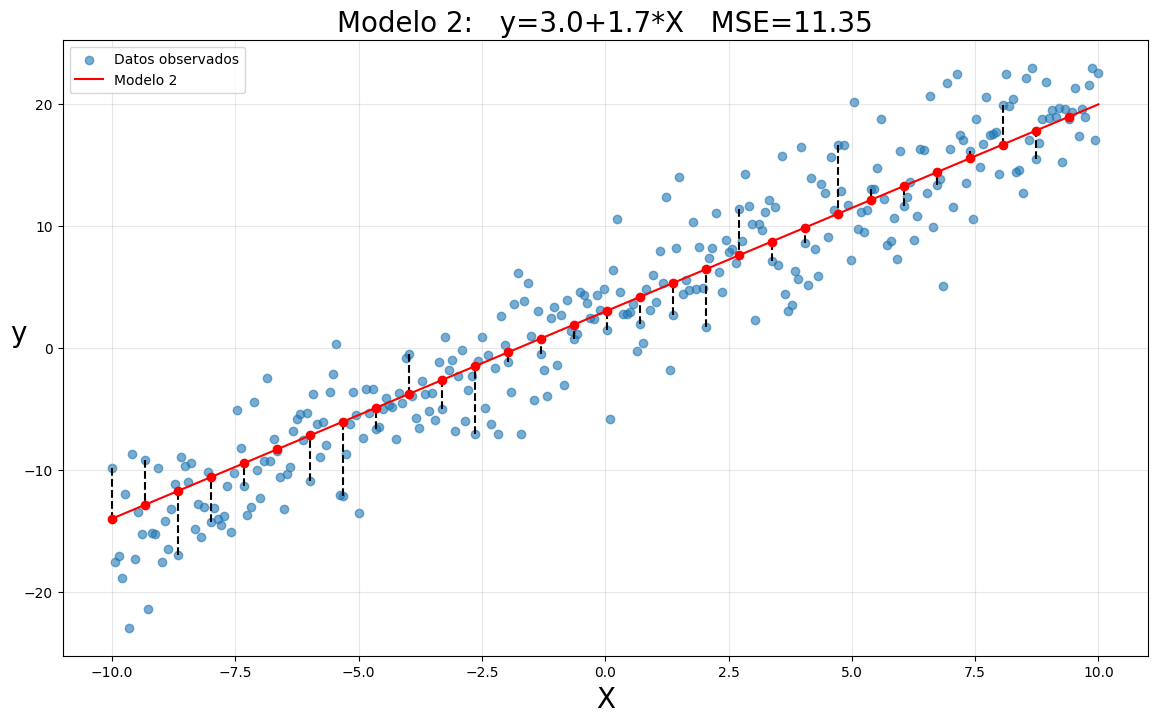

In [4]:
# VISUALIZACIÓN DEL MEJOR MODELO MANUAL (MODELO 2)

# Parámetros del Modelo 2
w0_2 = 3.0
w1_2 = 1.7
hw_2 = w0_2 + w1_2 * X
mse_2 = calcular_mse(w0_2, w1_2, X, y)


plt.figure(figsize=(14, 8))
# Graficamos los datos observados
plt.scatter(X, y, alpha=0.6, label='Datos observados')
# Graficamos la línea del Modelo 2
plt.plot(X, hw_2, color='red', label=f"Modelo 2")

# Dibujamos los residuos (errores) de cada X (entre 0 y 300, cada 10 puntos)
for i in range(0, len(X), 10):
    # Línea vertical desde el punto real (X,Y) hasta la predicción (X,hw_2)
    # Se dibuja primero la posición en X, luego la de Y.
    plt.plot([X[i], X[i]], [y[i], hw_2[i]], color='black', linestyle='--')
    # Marcamos el punto predicho en la línea
    # Se dibuja primero la posición en X, luego la de Y.
    plt.plot(X[i], hw_2[i], color='red', marker='o')


plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.title(f'Modelo 2:   y={w0_2}+{w1_2}*X   MSE={mse_2:.2f}', fontsize=20)
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()

# Python Implementation with Scikit-learn

### ¿Qué es train_test_split?
Uno de los aspectos clave del aprendizaje supervisado es la evaluación y validación del modelo. Cuando se evalúa el desempeño predictivo de un modelo, es esencial que el proceso sea imparcial.

No se puede evaluar el desempeño predictivo de un modelo con los mismos datos que se usaron para entrenarlo. Es necesario evaluar el modelo con datos nuevos que el modelo no haya visto antes. Esto puede lograrse dividiendo el conjunto de datos antes de utilizarlo.

Usando **train_test_split()** de la biblioteca de ciencia de datos de **scikit-learn** se divide un dataset en subconjuntos de **entrenamiento** y **prueba** de forma aleatoria, que minimizan el potencial de sesgo en el proceso de evaluación y validación.

`from sklearn.model_selection import train_test_split`

`X_train, X_test, y_train, y_test = train_test_split(X, y, [parámetros opcionales 3/4/5/6])`

**Retorna 4 arrays**:
- `X_train`: Variables independientes para entrenamiento
- `X_test`: Variables independientes para prueba
- `y_train`: Variable dependiente para entrenamiento
- `y_test`: Variable dependiente para prueba

**Parámetros**
1. `X` (array, shape = [n_samples, n_features])
- Variables **independientes** (features)
- Debe ser un array 2D (matriz)
- Cada fila = una observación
- Cada columna = una característica/variable

2. `y` (array, shape = [n_samples])
- Variable **dependiente** (target)
- Debe ser un array 1D (vector)
- Los valores reales que queremos predecir
  
3. `test_size` (default = 0.25)
**Descripción**: Proporción o cantidad de datos para el conjunto de prueba.
  - `test_size=0.2` → 20% test, 80% train (ó 30% test, 70% train)
  - `test_size=60` → 60 observaciones para test

4. `random_state` (default = None)
**Descripción**: Controla la reproducibilidad. Es de buena práctica usarlo.
  - `random_state=seed` → Definir seed=1 antes

5. `shuffle` (default = True)
**Descripción**: Si se deben mezclar los datos antes de dividir.
  - `shuffle=False` → **Sólo para Series Temporales**. Toma los primeros n% para train y los últimos n% para test (sin mezclar)

6. `stratify` (default = None)
**Descripción**: Mantiene las proporciones de las clases en train y test. 
  - `stratify=y` → **Sólo para problemas de clasificación**. Tanto train como test tendrán 80% de clase A y 20% de clase B.

In [7]:
# REGRESIÓN LINEAL CON SCIKIT-LEARN (sklearn)
# ===========================================

# Importamos las herramientas necesarias de sklearn
from sklearn.model_selection import train_test_split

# PASO 1: PREPARACIÓN DE DATOS
# -----------------------------
# X debe ser un array 2D (matriz) para sklearn. Convertimos de Vector a 2D
X_2d = X.reshape(-1, 1)  # reshape(-1, 1) convierte a columna

print("Forma original de X:", X.shape)      # (300,)
print("Forma de X_2d:", X_2d.shape)         # (300, 1)
print("Forma de y:", y.shape)               # (300,)


# PASO 2: DIVISIÓN EN CONJUNTOS DE ENTRENAMIENTO Y PRUEBA
# ---------------------------------------------------------
# train_test_split divide los datos en dos conjuntos:
# - Entrenamiento (train): para que el modelo aprenda (80%)
# - Prueba (test): para evaluar cómo se comporta (20%)

X_train, X_test, y_train, y_test = train_test_split(
    X_2d, y, 
    test_size=0.2,      # 20% para prueba, 80% para entrenamiento
    shuffle=True,       # Aleatoriedad de casas
    random_state=seed   # Semilla para reproducibilidad
)

Forma original de X: (300,)
Forma de X_2d: (300, 1)
Forma de y: (300,)


### ¿Qué es .fit()?

Es el método de **sklearn** que **entrena** el modelo con los datos de entrenamiento. Encuentra los parámetros óptimos (w0, w1, etc.) que minimizan el error.

`modelo.fit(X, y)`

**Parámetros**
1. `X` (ídem anterior)

2. `y` (ídem anterior)

#### ¿Qué hace .fit() internamente?

1. Recibe los datos de entrenamiento (X_train, y_train)
2. Aplica el algoritmo de **Mínimos Cuadrados Ordinarios (OLS)**
3. Encuentra los parámetros que **minimizan el MSE**
4. Guarda los parámetros aprendidos en el objeto modelo. **NO retorna** los parámetros directamente. Los guarda como **atributos** del modelo:
- **`modelo.intercept_`** → w0 (intercepto)
- **`modelo.coef_`** → w1, w2, w3... (pendientes/coeficientes)

### MUY IMPORTANTE
- `.fit()` **modifica** el objeto modelo (lo entrena)
- Después de `.fit()`, el modelo está listo para hacer predicciones con `.predict()`
- Si llamas `.fit()` nuevamente, **sobre-escribe** el entrenamiento anterior

In [8]:
# PASO 3: CREACIÓN Y ENTRENAMIENTO DEL MODELO
# --------------------------------------------

from sklearn.linear_model import LinearRegression
# modelo = LinearRegression  (es el estimador de sklearn para regresión lineal)
# Usa OLS (Mínimos Cuadrados Ordinarios) para minimizar MSE
# fit() entrena el modelo y encuentra los mejores w0 y w1
# coef_ es un array, tomamos el primer elemento

modelo = LinearRegression()
modelo.fit(X_train, y_train)

#w0 = intercept
#w1 w2 w3 w4 = [12, 14, 2 , -4, 0 ...]
w0_sklearn = modelo.intercept_
w1_sklearn = modelo.coef_[0]


print(f"Parámetros REALES usados para generar los datos:")
print(f" w0 = {w0}")
print(f" w1 = {w1}")
print()
print(f"Parámetros PREDICHOS como ÓPTIMOS:")
print(f" w0 = {w0_sklearn:.4f}")
print(f" w1 = {w1_sklearn:.4f}")

Parámetros REALES usados para generar los datos:
 w0 = 2.5
 w1 = 1.8

Parámetros PREDICHOS como ÓPTIMOS:
 w0 = 2.7526
 w1 = 1.8174


### ¿Qué es .predict()?

Es el método de **sklearn** que genera **predicciones** usando los parámetros que el modelo aprendió durante el entrenamiento. Calcula los valores de y estimados (Hw) para nuevas observaciones de X.

`hw = modelo.predict(X)`


**Parámetro**

1. `X` (array, shape = [n_samples, n_features])
- Variables **independientes** sobre las cuales se quiere predecir
- Debe ser un array 2D (matriz)
- Debe tener el **mismo número de columnas** (features) que los datos usados en `.fit()`
- Puede tener cualquier número de filas (observaciones)


#### ¿Qué hace .predict() internamente?

1. Recibe los datos X (variables independientes)
2. Usa los parámetros aprendidos: `modelo.intercept_` y `modelo.coef_`
3. Calcula: **Hw = w0 + w1*X** (para regresión lineal simple)
4. Retorna un array 1D con las predicciones:
- *Shape*: [n_samples]
- Cada elemento es la predicción (Hw) para la observación correspondiente


**Usos comunes**
- Predicción sobre datos de PRUEBA (evaluación del modelo), donde se calcula el MSE del test de Prueba

`hw_test = modelo.predict(X_test)`

`mse = mean_squared_error(y_test, hw_test)`


- Predicción sobre TODOS los datos (visualización), donde se plotea una línea de regresión.

`hw_completo = modelo.predict(X_2d)`

`plt.plot(X, hw_completo, 'r-')`

- Predicción sobre datos NUEVOS (uso del modelo en producción), donde X_nuevo corresponde a una nueva observación

`X_nuevo = np.array([[5.2]])`

`hw_nuevo = modelo.predict(X_nuevo)`

`print(f"Predicción: {hw_nuevo[0]:.2f}")`

### MUY IMPORTANTE
- `.predict()` **requiere** que el modelo ya esté entrenado (llamar `.fit()` primero)
- Si intentas `.predict()` antes de `.fit()`, sklearn dará un error
- Las predicciones usan los parámetros que el modelo aprendió, no los modifica
- Puedes llamar `.predict()` múltiples veces sin problema


### MSE y R² (Coeficiente de Determinación)

**R²** mide qué proporción de la varianza de **y** es explicada por el modelo.

**Interpretación:**
- **R² = 1** → Modelo perfecto (explica 100% de la variabilidad)
- **R² = 0.7 - 0.9** → Muy bueno
- **R² = 0.5 - 0.7** → Aceptable/Moderado
- **R² = 0.3 - 0.5** → Débil
- **R² = 0.1 - 0.3** → Muy Débil
- **R² = 0** → El modelo no es mejor que usar la media de Y
- **R² < 0** → El modelo es peor que usar la media

In [9]:
# PASO 4: EVALUACIÓN DEL MODELO
# ------------------------------
# Evaluamos qué tan bien predice el modelo
# Usamos datos que NO vio durante el entrenamiento

from sklearn.metrics import mean_squared_error

hw_test = modelo.predict(X_test)  # El modelo hace predicciones sobre X_test


mse_test = mean_squared_error(y_test, hw_test) # Calculamos el MSE con python!
r2_test = modelo.score(X_test, y_test)

# El MSE se calcula comparando las predicciones con los valores reales!!!
# R² mide qué proporción de la varianza de y es explicada por el modelo

print(f"MSE (Error Cuadrático Medio):     {mse_test:.4f}")
print(f"RMSE (Raíz del MSE):               {np.sqrt(mse_test):.4f}")
print(f"R² (Coeficiente de Determinación): {r2_test:.4f}")
print()
print(f"""En promedio, las predicciones del modelo
se desvían aproximadamente {np.sqrt(mse_test):.2f} unidades
de los valores reales.""")
print()
print(f"El modelo explica el {r2_test*100:.2f}% de la variabilidad de Y")

MSE (Error Cuadrático Medio):     9.6503
RMSE (Raíz del MSE):               3.1065
R² (Coeficiente de Determinación): 0.9176

En promedio, las predicciones del modelo
se desvían aproximadamente 3.11 unidades
de los valores reales.

El modelo explica el 91.76% de la variabilidad de Y


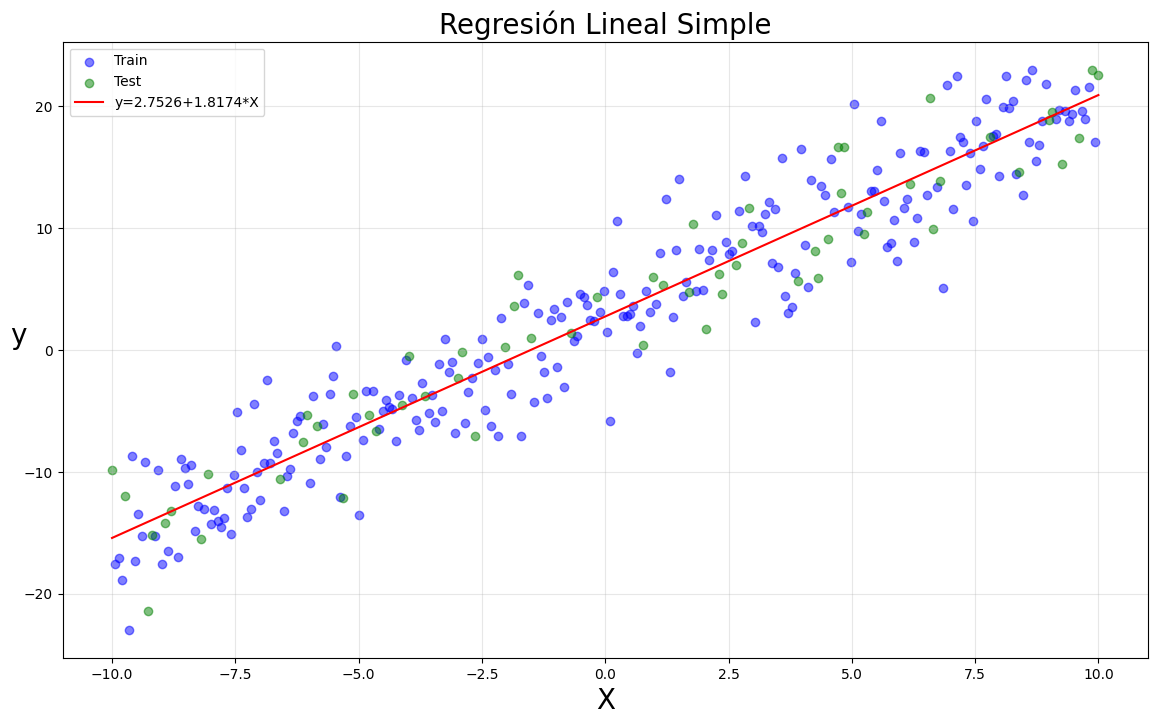

- Puntos azules: datos de ENTRENAMIENTO (el modelo aprendió de ellos)
- Puntos verdes: datos de PRUEBA (el modelo NO vio estos durante el entrenamiento)
- Línea roja: modelo entrenado


In [10]:
# PASO 5: VISUALIZACIÓN
# ---------------------

plt.figure(figsize=(14, 8))

# Datos de entrenamiento vs Datos de prueba
plt.scatter(X_train, y_train, alpha=0.5, color='blue',  label='Train')
plt.scatter(X_test,  y_test,  alpha=0.5, color='green', label='Test')

# Línea de regresión.
# Creo 100 puntos equidistantes entre el mínimo de X (-10) y el máximo (10)
# La paso a matriz: es una matriz de 100 filas × 1 columna (valores -10 a 10)
# Luego uso predict sobre esa matriz para calcular una regresión perfecta.
X_linea = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
hw_linea = modelo.predict(X_linea)
plt.plot(X_linea, hw_linea, color='red', 
         label=f"y={w0_sklearn:.4f}+{w1_sklearn:.4f}*X")

plt.xlabel('X', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.title('Regresión Lineal Simple', fontsize=20)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


print("- Puntos azules: datos de ENTRENAMIENTO (el modelo aprendió de ellos)")
print("- Puntos verdes: datos de PRUEBA (el modelo NO vio estos durante el entrenamiento)")
print("- Línea roja: modelo entrenado")

## Ejemplo: Datos de Viviendas de Boston

El conjunto de datos de viviendas de Boston proporciona mediciones de 13 atributos de los mercados inmobiliarios alrededor de Boston, así como el precio mediano. Queremos predecir el precio de un mercado dado un conjunto de atributos.

```
CRIM - tasa de criminalidad per cápita por localidad
ZN - proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados
INDUS - proporción de acres de negocios no minoristas por localidad
CHAS - variable ficticia del río Charles (1 si el sector limita con el río; 0 en caso contrario)
NOX - concentración de óxidos nítricos (partes por cada 10 millones)
RM - número promedio de habitaciones por vivienda
AGE - proporción de unidades ocupadas por sus propietarios construidas antes de 1940
DIS - distancias ponderadas a cinco centros de empleo de Boston
RAD - índice de accesibilidad a autopistas radiales
TAX - tasa del impuesto a la propiedad a valor completo por cada 10.000 dólares
PTRATIO - relación alumno-docente por localidad
LSTAT - % de población de menor nivel socioeconómico
MEDV - valor mediano de viviendas ocupadas por sus propietarios en miles de dólares
```


In [11]:
from pandas import read_csv
import pandas as pd
seed=1

df_boston = pd.read_csv('housing.csv', sep='\s+', header=None,              
                        names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
                               'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                               'PTRATIO', 'B', 'LSTAT', 'MEDV'])

df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [12]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [13]:
df_boston['MEDV'].mean()

np.float64(22.532806324110677)

Primero consideramos la tarea de predecir los **Valores medianos de las viviendas = MEDV** en el área de Boston utilizando como predictor uno de los atributos; por ejemplo, **LSTAT = proporción de población de menor nivel socioeconómico”**.

Pasos:
- Visualizamos los datos que queremos ajustar
- Dividimos los datos en un conjunto de entrenamiento y uno de prueba
- Ajustamos una regresión lineal simple utilizando la variable LSTAT para predecir Price
- Evaluamos qué tan buena es la regresión

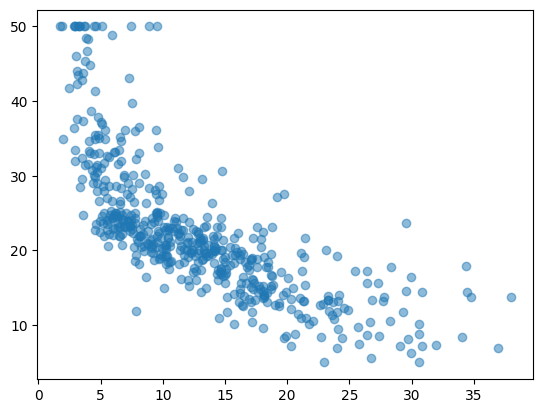

In [14]:
import matplotlib.pyplot as plt
X = df_boston.LSTAT.values.reshape(-1, 1)
y = df_boston.MEDV.values
plt.scatter(X, y, marker="o", alpha=0.5)

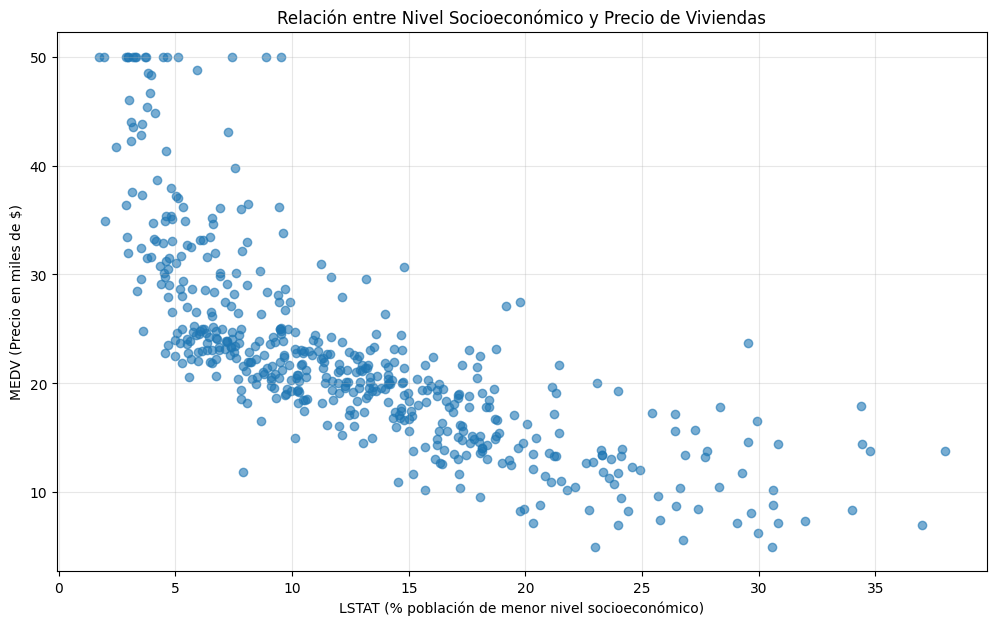


Observación: Se ve una relación NEGATIVA
A mayor % de población de bajo nivel socioeconómico → menor precio



In [15]:
# PASO 1: VISUALIZACIÓN DE LOS DATOS
# -----------------------------------

# Queremos predecir MEDV (precio) usando LSTAT (% población bajo nivel socioeconómico)
X = df_boston['LSTAT'].values.reshape(-1, 1)   # Variable independiente X (2D)
y = df_boston['MEDV'].values                   # Variable dependiente Y (1D)

plt.figure(figsize=(12, 7))
plt.scatter(X, y, alpha=0.6)
plt.xlabel('LSTAT (% población de menor nivel socioeconómico)')
plt.ylabel('MEDV (Precio en miles de $)', rotation=90)
plt.title('Relación entre Nivel Socioeconómico y Precio de Viviendas')
plt.grid(True, alpha=0.3)
plt.show()

print(f"""
Observación: Se ve una relación NEGATIVA
A mayor % de población de bajo nivel socioeconómico → menor precio
""")

In [17]:
# PASO 2: DIVISIÓN EN TRAIN Y TEST
# ---------------------------------

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=seed
)

print(f"Total de datos: {len(X)}")
print(f"Datos de entrenamiento: {len(X_train)} (80%)")
print(f"Datos de prueba: {len(X_test)} (20%)")

Total de datos: 506
Datos de entrenamiento: 404 (80%)
Datos de prueba: 102 (20%)


In [18]:
# PASO 3: ENTRENAMIENTO DEL MODELO
# ---------------------------------
from sklearn.linear_model import LinearRegression

modelo_boston = LinearRegression()
modelo_boston.fit(X_train, y_train)

w0 = modelo_boston.intercept_
w1 = modelo_boston.coef_[0]


print(f"w0 (intercepto): {w0:.4f}")
print(f"w1 (pendiente):  {w1:.4f}")
print(f"Ecuación: MEDV = {w0:.2f} + ({w1:.2f}) * LSTAT")

print(f"""
Interpretación: Por cada 1% de aumento en LSTAT,
el precio disminuye en ${abs(w1):.2f}k dólares
""")

w0 (intercepto): 34.3350
w1 (pendiente):  -0.9244
Ecuación: MEDV = 34.33 + (-0.92) * LSTAT

Interpretación: Por cada 1% de aumento en LSTAT,
el precio disminuye en $0.92k dólares



In [24]:
# PASO 4: EVALUACIÓN DEL MODELO
# ------------------------------
from sklearn.metrics import mean_squared_error

hw_test = modelo_boston.predict(X_test)
mse_test = mean_squared_error(y_test, hw_test)
r2_test = modelo_boston.score(X_test, y_test)


print(f"MSE (Error Cuadrático Medio):     {mse_test:.4f}")
print(f"RMSE (Raíz del MSE):               {np.sqrt(mse_test):.4f}")
print(f"R² (Coeficiente de Determinación): {r2_test:.4f}")

print(f"""
El modelo explica el {r2_test*100:.2f}% de la variabilidad del precio.
En promedio, las predicciones se desvían ${np.sqrt(mse_test):.2f}k del precio real
""")

MSE (Error Cuadrático Medio):     46.9948
RMSE (Raíz del MSE):               6.8553
R² (Coeficiente de Determinación): 0.5245

El modelo explica el 52.45% de la variabilidad del precio.
En promedio, las predicciones se desvían $6.86k del precio real



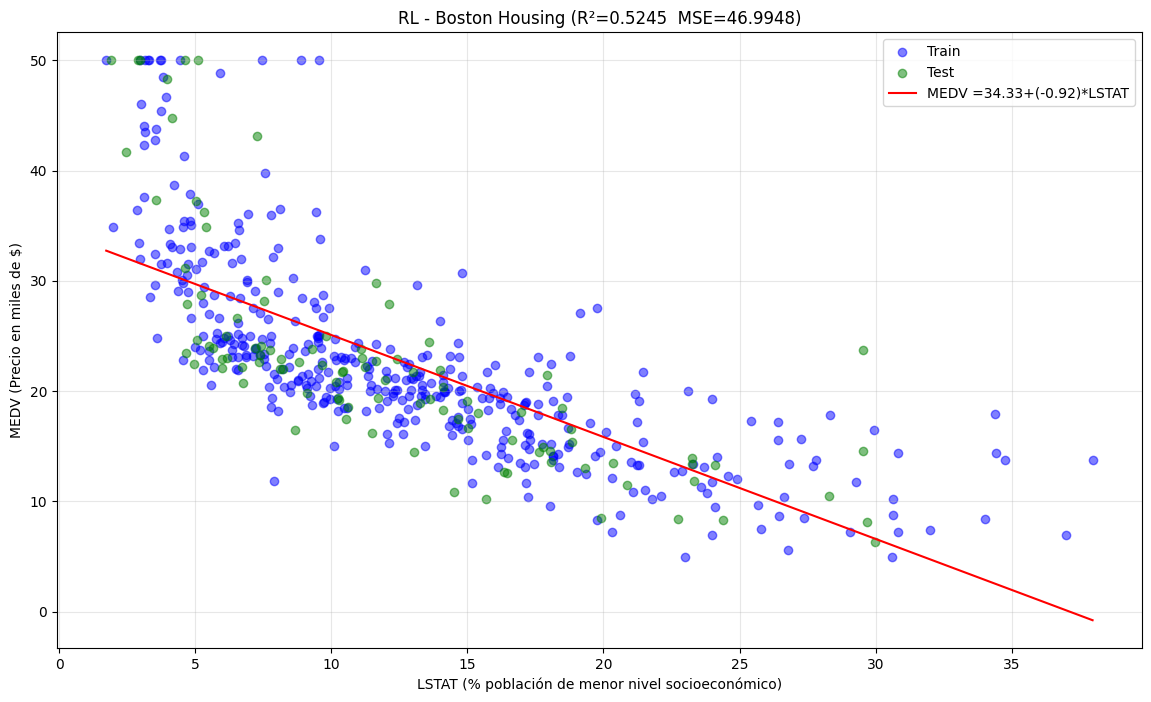

- Puntos azules: datos de entrenamiento
- Puntos verdes: datos de prueba
- Línea roja: modelo de regresión lineal


In [25]:
# PASO 5: VISUALIZACIÓN FINAL
# ----------------------------
plt.figure(figsize=(14, 8))

# Datos de entrenamiento y prueba
plt.scatter(X_train, y_train, alpha=0.5, color='blue',  label='Train')
plt.scatter(X_test,  y_test,  alpha=0.5, color='green', label='Test')

# Línea de regresión
X_linea = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
hw_linea = modelo_boston.predict(X_linea)
plt.plot(X_linea, hw_linea, color='red',
         label=f'MEDV ={w0:.2f}+({w1:.2f})*LSTAT')

plt.xlabel('LSTAT (% población de menor nivel socioeconómico)')
plt.ylabel('MEDV (Precio en miles de $)', rotation=90)
plt.title(f'RL - Boston Housing (R²={r2_test:.4f}  MSE={mse_test:.4f})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("- Puntos azules: datos de entrenamiento")
print("- Puntos verdes: datos de prueba")
print("- Línea roja: modelo de regresión lineal")

#### Interpretación de los Resultados

*MSE = 46.99 --> RMSE = USD 6.86*
- En promedio, las predicciones se desvían casi USD 7k del precio real.
- Para precios que van de USD 5k a USD 50k, **este error es considerable**.

*R² = 0.52 (52%)*
- El modelo explica el 52% de la variabilidad del precio. Para una sóla variable, es **aceptable**.
- Esto confirma que **LSTAT sí tiene una relación significativa** con el precio de las viviendas.
- Sin embargo, el **48% restante** depende de **otros factores** no considerados: número de habitaciones, criminalidad, ubicación, antigüedad, etc.

*Conclusión*:
- El precio de una vivienda es un fenómeno **multivariable complejo**. Para mejorar las predicciones, se necesita **regresión múltiple** con más variables independientes.